### TELECOM CHURN 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

##### DATA DICTIONARY 

#### Acronyms   
- CIRCLE_ID - Telecom circle area to which the customer belongs to
- LOC - Local calls  within same telecom circle
- STD - STD calls  outside the calling circle
- IC - Incoming calls
- OG - Outgoing calls
- T2T - Operator T to T ie within same operator mobile to mobile
- T2M - Operator T to other operator mobile
- T2O - Operator T to other operator fixed line
- T2F - Operator T to fixed lines of T
- T2C - Operator T to its own call center
- ARPU - Average revenue per user
- MOU - Minutes of usage  voice calls
- AON - Age on network  number of days the customer is using the operator T network
- ONNET - All kind of calls within the same operator network
- OFFNET - All kind of calls outside the operator T network
- ROAM - Indicates that customer is in roaming zone during the call
- SPL - Special calls
- ISD - ISD calls
- RECH - Recharge
- NUM - Number
- AMT - Amount in local currency
- MAX - Maximum
- DATA - Mobile internet
- 3G - G network
- AV - Average
- VOL - Mobile internet usage volume in MB
- 2G - G network
- PCK - Prepaid service schemes called  PACKS
- NIGHT - Scheme to use during specific night hours only
- MONTHLY - Service schemes with validity equivalent to a month
- SACHET - Service schemes with validity smaller than a month
- *.6 - KPI for the month of June
- *.7 - KPI for the month of July
- *.8 - KPI for the month of August
- FB_USER - Service scheme to avail services of Facebook and similar social networking sites
- VBC - Volume based cost  when no specific scheme is not purchased and paid as per usage



##### IGNORE WARNINGS

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

##### IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORTING & READING THE DATASET

In [3]:
# Importing dataset
data = pd.read_csv('Dataset/train.csv')
 
##copy data
data_copy=data

# To display maximum rows and columns
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

### CREATING REQUIRED FUNCTIONS

In [4]:
# To find number of rows and cols
def num_rows():
    rows, columns = data.shape
    print(f'The dataset has {rows} rows and {columns} columns')

# To find percentage missing values
def percentage_missing(data):
    print('\nPERCENTAGE MISSING VALUES:')
    c=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            c+=1
    if c == len(data.columns):print('There is no missing values in the dataset')
    print("\n")

### NUMBER OF ROWS AND COLS

In [5]:
num_rows()

The dataset has 69999 rows and 172 columns


#### NUMBER OF FEATURES

In [6]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 163 numerical features and 9 categorical features.


#### BASIC INFO ON THE DATASET

In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Looking for data duplicates

In [8]:
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### ANALYSIS ON TARGET VARIABLE

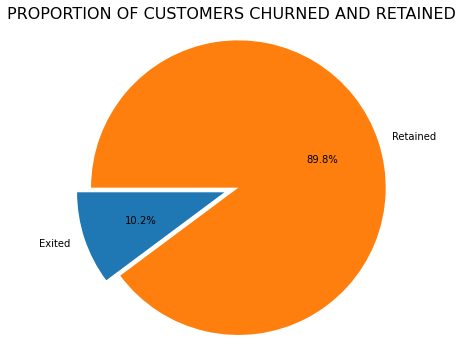

In [9]:
labels = 'Exited', 'Retained'
sizes = [data.churn_probability[data['churn_probability']==1].count(), 
         data.churn_probability[data['churn_probability']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180)
ax1.axis('equal')
plt.title("PROPORTION OF CUSTOMERS CHURNED AND RETAINED", size = 16)
plt.show()

#### DATA TREATMENT 

###  Removing features which has one unique and all distinct value

In [10]:
# CHECKING THE UNIQUE AND DISTINCT VARIABLE
rm_lst = []
for i in data.columns:
    if data[i].nunique() in (1, 69999) and i!='churn_probability':
        print(i, data[i].nunique(), sep = ' --> ')
        rm_lst.append(i)

id --> 69999
circle_id --> 1
loc_og_t2o_mou --> 1
std_og_t2o_mou --> 1
loc_ic_t2o_mou --> 1
last_date_of_month_6 --> 1
last_date_of_month_7 --> 1
last_date_of_month_8 --> 1
std_og_t2c_mou_6 --> 1
std_og_t2c_mou_7 --> 1
std_og_t2c_mou_8 --> 1
std_ic_t2o_mou_6 --> 1
std_ic_t2o_mou_7 --> 1
std_ic_t2o_mou_8 --> 1


In [11]:
# REMOVING THE ABOVE VARIABLE
for i in rm_lst:
    del data[i]

# DATA DIMENSION AFTER REMOVAL
num_rows()

The dataset has 69999 rows and 158 columns


### MISSING VALUE TREATMENT

In [12]:
# Finding the percentage missing values in the dataset
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2m_mou_8' has 5.29% missing values
The featu

In [13]:
print('\nLESS THAN 50% MISSING VALUES IMPUTATION')
rm_lst = []

for i in data.columns:
    if data[i].isnull().mean()*100 > 50.0 :
        rm_lst.append(i)

print(rm_lst)
print(len(rm_lst))    


LESS THAN 50% MISSING VALUES IMPUTATION
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
30


In [14]:
### Removing columns more than 50% null values
for feature in rm_lst:
    del data[feature]

In [15]:
num_rows()
percentage_missing(data)

The dataset has 69999 rows and 128 columns

PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2

#### Removing date columns as it has no relavant to ten analysis being done

In [16]:
# List the date columns
date_cols = [date for date in data.columns.to_list() if 'date' in date]
print(date_cols) 
for feature in date_cols:
    del data[feature]

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [19]:
data.describe([0.25,0.50,0.75,0.7,0.9,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,306.451436,310.572674,304.513065,48.043255,47.882736,47.256388,1

In [25]:
cols=list(data.columns)
cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [ ]:
valids = data[cols].le(data[cols].quantile(0.99)).all(1)

data[valids]

In [18]:
df[data < data.quantile(.95)]

KeyboardInterrupt: 

In [ ]:
data.skew()

In [ ]:
# drop rows with null values
data = data[~np.isnan(data['onnet_mou_6'])]
data = data[~np.isnan(data['onnet_mou_7'])]
data = data[~np.isnan(data['onnet_mou_8'])]
data = data[~np.isnan(data['offnet_mou_6'])]
data = data[~np.isnan(data['offnet_mou_7'])]
data = data[~np.isnan(data['offnet_mou_8'])]
data = data[~np.isnan(data['roam_ic_mou_6'])]
data = data[~np.isnan(data['roam_ic_mou_7'])]
data = data[~np.isnan(data['roam_ic_mou_8'])]
data = data[~np.isnan(data['roam_og_mou_6'])]
data = data[~np.isnan(data['roam_og_mou_7'])]
data = data[~np.isnan(data['roam_og_mou_8'])]
data = data[~np.isnan(data['loc_og_t2c_mou_6'])]
data = data[~np.isnan(data['loc_og_t2c_mou_7'])]
data = data[~np.isnan(data['loc_og_t2c_mou_8'])]
data = data[~np.isnan(data['loc_og_mou_6'])]
data = data[~np.isnan(data['loc_og_mou_7'])]
data = data[~np.isnan(data['loc_og_mou_8'])]
data = data[~np.isnan(data['std_og_t2f_mou_6'])]
data = data[~np.isnan(data['std_og_t2f_mou_7'])]
data = data[~np.isnan(data['std_og_t2f_mou_8'])]
data = data[~np.isnan(data['std_og_mou_6'])]
data = data[~np.isnan(data['std_og_mou_7'])]
data = data[~np.isnan(data['std_og_mou_8'])]
data = data[~np.isnan(data['isd_og_mou_6'])]
data = data[~np.isnan(data['isd_og_mou_7'])]
data = data[~np.isnan(data['isd_og_mou_8'])]
data = data[~np.isnan(data['spl_og_mou_6'])]
data = data[~np.isnan(data['spl_og_mou_7'])]
data = data[~np.isnan(data['spl_og_mou_8'])]
data = data[~np.isnan(data['og_others_6'])]
data = data[~np.isnan(data['og_others_7'])]
data = data[~np.isnan(data['og_others_8'])]
data = data[~np.isnan(data['loc_ic_mou_6'])]
data = data[~np.isnan(data['loc_ic_mou_7'])]
data = data[~np.isnan(data['loc_ic_mou_8'])]
data = data[~np.isnan(data['std_ic_t2t_mou_6'])]
data = data[~np.isnan(data['std_ic_t2t_mou_7'])]
data = data[~np.isnan(data['std_ic_t2t_mou_8'])]
data = data[~np.isnan(data['std_ic_t2f_mou_6'])]
data = data[~np.isnan(data['std_ic_t2f_mou_7'])]
data = data[~np.isnan(data['std_ic_t2f_mou_8'])]
data = data[~np.isnan(data['std_ic_mou_6'])]
data = data[~np.isnan(data['std_ic_mou_7'])]
data = data[~np.isnan(data['std_ic_mou_8'])]
data = data[~np.isnan(data['spl_ic_mou_6'])]
data = data[~np.isnan(data['spl_ic_mou_7'])]
data = data[~np.isnan(data['spl_ic_mou_8'])]
data = data[~np.isnan(data['isd_ic_mou_6'])]
data = data[~np.isnan(data['isd_ic_mou_7'])]
data = data[~np.isnan(data['isd_ic_mou_8'])]
data = data[~np.isnan(data['ic_others_6'])]
data = data[~np.isnan(data['ic_others_7'])]
data = data[~np.isnan(data['ic_others_8'])]

In [ ]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = data.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
print(col_list)
print (data.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    data[avg_col_name] = (data[col_6] + data[col_7])/ 2

##### UNIVARIATE ANALYSIS